In [80]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv('Country-data.csv')
dataset.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [82]:
coutries = dataset['country']
dataset.drop('country', axis=1, inplace=True)

In [83]:
dataset

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [84]:
dataset.isna().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [85]:
dataset.nunique()

child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [86]:
pca = PCA(n_components=6).fit_transform(dataset)

In [87]:
pca1 = pd.DataFrame(pca, columns = ['P1', 'P2', 'P3', 'P4','P5','P6'])

In [88]:
pca1

P1           P2         P3         P4         P5         P6
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944
..            ...          ...        ...        ...        ...        ...
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527

[167 rows x 6 columns]

In [89]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit_predict(pca1)
kmeans

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [90]:
pca1['clusters']=kmeans
pca1

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

     clusters  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
162         1  
163         1  
164         1  
165         1  
166         1  

[167 rows x 7 columns]

In [91]:
pca1['coutry']=coutries

In [92]:
pca1[pca1['clusters']==2]

P1            P2          P3          P4         P5        P6  \
23    61458.574209  27355.235838   49.710155  -26.149548  -2.319222  2.834675   
82    59732.237329  21320.360857   42.960187  -21.821248  -2.321661 -1.182633   
91   117402.802496 -15674.306655    9.590866  131.308170  12.240123  5.057959   
114   84221.602999 -23369.364656   32.183682  -25.973504   6.695966  4.871876   
123  117767.796733  32417.612312  105.472950  -42.525540 -25.912922  5.314881   
133   63043.344018  13304.440106  -34.193450  163.118906  -0.087152 -0.146819   
145   70212.596960 -18447.226485   11.588092    6.727359   4.240551 -0.275711   

     clusters       coutry  
23          2       Brunei  
82          2       Kuwait  
91          2   Luxembourg  
114         2       Norway  
123         2        Qatar  
133         2    Singapore  
145         2  Switzerland

In [93]:
import seaborn as sns

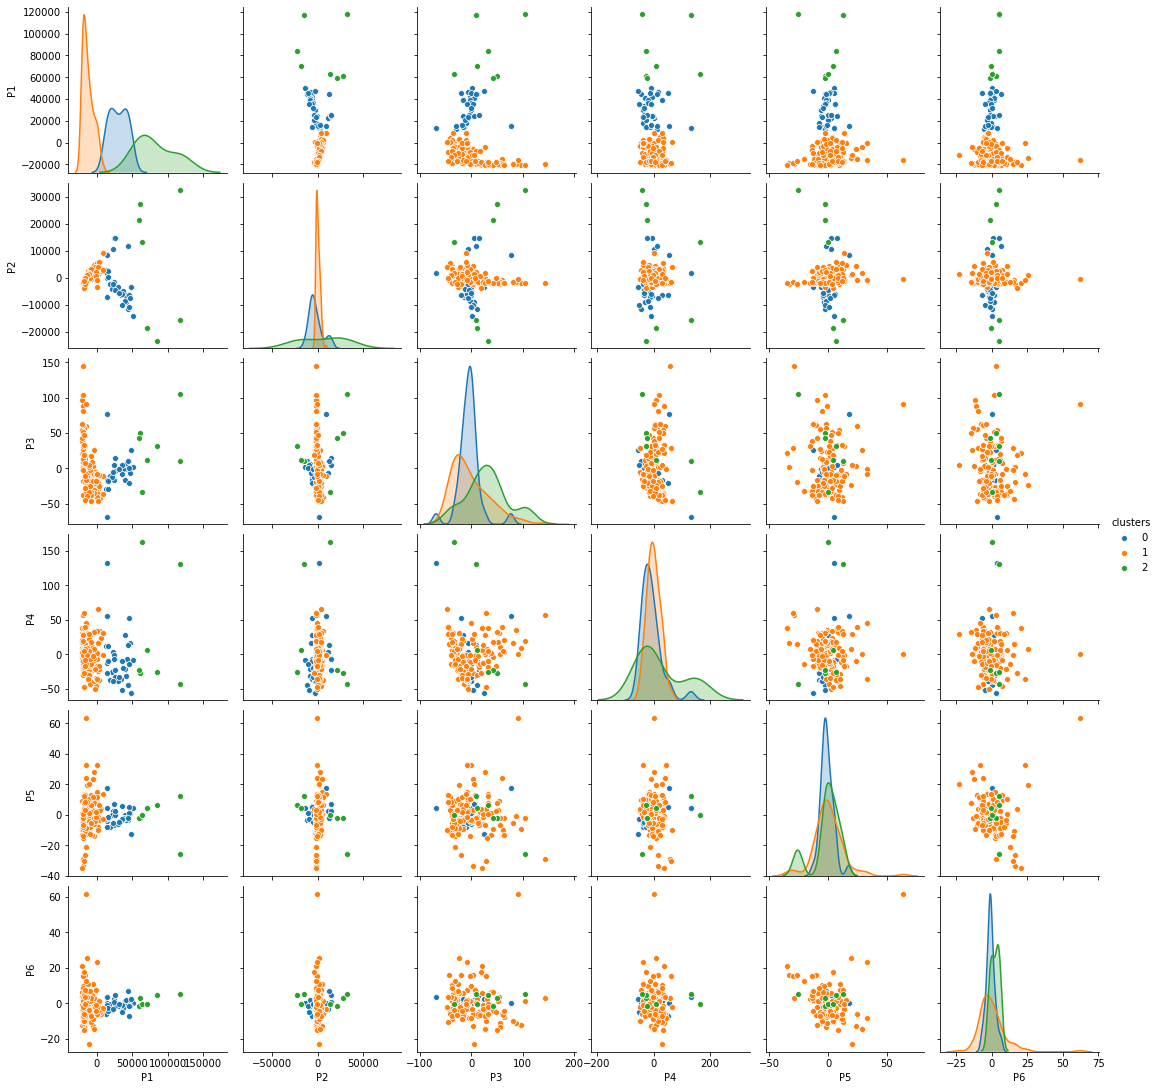

In [94]:
sns.pairplot(pca1, hue='clusters')

In [95]:
pca1

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

     clusters               coutry  
0           1          Afghanistan  
1           1              Albania  
2           1              Algeria  
3           1               Angola  
4           1  Antigua and Barbuda  
..        ...                  ...  
162         1              Vanuatu  
163         1            Venezuela  
164         1              Vietnam  
165         1                Yemen  
166         1               Zambia  

[167 rows x 8 columns]

In [97]:
# naming: underdeveloping, developing and developed countries
pca1[pca1['clusters']==1]

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

     clusters               coutry  
0           1          Afghanistan  
1           1              Albania  
2           1              Algeria  
3           1               Angola  
4           1  Antigua and Barbuda  
..        ...                  ...  
162         1              Vanuatu  
163         1            Venezuela  
164         1              Vietnam  
165         1                Yemen  
166         1               Zambia  

[128 rows x 8 columns]

In [102]:
pca1['clusters'].replace(1, 'Developing', inplace = True)
pca1['clusters'].replace(0, 'Under developing', inplace = True)
pca1['clusters'].replace(2, 'Developed', inplace = True)

In [103]:
pca1

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

       clusters               coutry  
0    Developing          Afghanistan  
1    Developing              Albania  
2    Developing              Algeria  
3    Developing               Angola  
4    Developing  Antigua and Barbuda  
..          ...                  ...  
162  Developing              Vanuatu  
163  Developing            Venezuela  
164  Developing              Vietnam  
165  Developing                Yemen  
166  Developing               Zambia  

[167 rows x 8 columns]

In [79]:
# Hierarchical method
agl = AgglomerativeClustering(n_clusters=3, linkage = 'ward').fit_predict(dataset)
agl

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2])

In [104]:
pca1['clusters']=agl
pca1

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

     clusters               coutry  
0           2          Afghanistan  
1           2              Albania  
2           2              Algeria  
3           2               Angola  
4           1  Antigua and Barbuda  
..        ...                  ...  
162         2              Vanuatu  
163         1            Venezuela  
164         2              Vietnam  
165         2                Yemen  
166         2               Zambia  

[167 rows x 8 columns]

In [107]:
pca1['clusters'].replace(1, 'Developing', inplace = True)
pca1['clusters'].replace(0, 'Under developing', inplace = True)
pca1['clusters'].replace(2, 'Developed', inplace = True)

In [108]:
pca1

P1           P2         P3         P4         P5         P6  \
0   -19815.128018 -1651.124720  38.424930  -0.192311 -13.395274   6.528804   
1   -11338.938992  1493.469028 -28.182163 -14.070214  -7.859092   2.858821   
2    -8926.352589  3264.684102 -11.916113 -16.804181  12.238446   0.164026   
3   -14652.465937  -867.795270  59.558400  40.492538  24.138701  -6.150069   
4      896.142032  1898.478151 -29.133957   0.507663  -7.630103   0.394944   
..            ...          ...        ...        ...        ...        ...   
162 -17180.967679 -2487.153835 -28.120653   8.630281   3.138299  -6.350844   
163   -100.445973  -832.252802  -7.709222 -35.835451  32.609135  23.560489   
164 -17202.017189  -222.889872 -45.250167  39.915284   8.346047   3.675373   
165 -17209.340213  -229.815901   7.958786  -7.521495  12.978900   7.508514   
166 -17978.421643 -1163.124631  32.202279   5.350797  12.161930  -6.111527   

       clusters               coutry  
0     Developed          Afghanistan  
1     Developed              Albania  
2     Developed              Algeria  
3     Developed               Angola  
4    Developing  Antigua and Barbuda  
..          ...                  ...  
162   Developed              Vanuatu  
163  Developing            Venezuela  
164   Developed              Vietnam  
165   Developed                Yemen  
166   Developed               Zambia  

[167 rows x 8 columns]